In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

In [3]:
def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

In [4]:
path = "Neural Networks/Introduction to Neural Networks"
data = pd.read_csv(path+'/data/data.csv', header=None)
data.head()

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


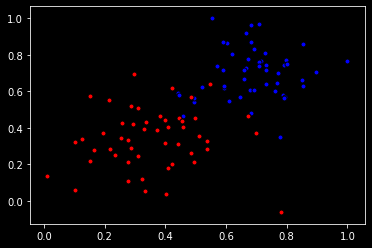

In [5]:
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
# Output (prediction) formula
def forward(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

In [8]:
# Error (log-loss) formula
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

In [9]:
# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = forward(x, weights, bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias

In [11]:
np.random.seed(44)

epochs = 500
learnrate = 0.001

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    # init random weight
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = forward(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = forward(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train loss:  0.7386145572441224
Accuracy:  0.39

========== Epoch 50 ==========
Train loss:  0.6675811793441313
Accuracy:  0.61

========== Epoch 100 ==========
Train loss:  0.6257964716739748
Accuracy:  0.7

========== Epoch 150 ==========
Train loss:  0.589283864476985
Accuracy:  0.76

========== Epoch 200 ==========
Train loss:  0.5570808420146056
Accuracy:  0.84

========== Epoch 250 ==========
Train loss:  0.5286113397943637
Accuracy:  0.87

========== Epoch 300 ==========
Train loss:  0.5033589929525278
Accuracy:  0.89

========== Epoch 350 ==========
Train loss:  0.48087540147919117
Accuracy:  0.91

========== Epoch 400 ==========
Train loss:  0.4607768160185913
Accuracy:  0.92

========== Epoch 450 ==========
Train loss:  0.4427369930030451
Accuracy:  0.93


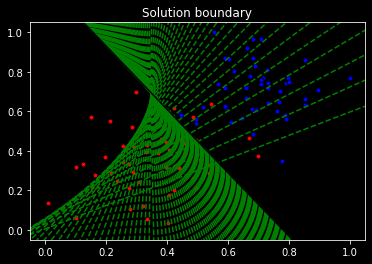

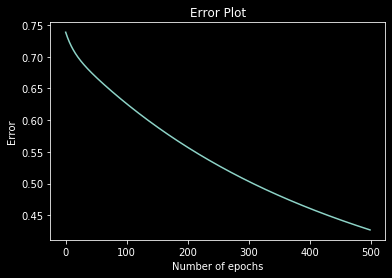

In [12]:
train(X, y, epochs, learnrate, True)